# Dependency Survey Results

### Download information

In [1]:
import pandas as pd
import numpy as np

In [2]:
file = "Dependency Management Survey_October 28, 2018_14.07.csv"
df = pd.read_csv(file)
df = df[5:]

### Check data and wrangle

In [3]:
metadf = df[["StartDate", "EndDate", "Progress", "LocationLatitude", "LocationLongitude"]]
# print(metadf.to_string())

# This snippet groups the geographic regions together
areas = {}
for index, row in metadf.iterrows():
    if row[2] != "100":
        continue
    thiscoord = (float(row[3]), float(row[4]))
    seen = False
    for key in areas:
        if abs(key[0] - thiscoord[0]) < 10 and abs(key[1] - thiscoord[1]) < 10:
            areas[key] += 1
            seen = True
            break
    if not seen:
        areas[thiscoord] = 1

print(areas)

{(-36.86669921875, 174.76669311523): 34, (35.63330078125, 139.64999389648): 2, (40.720901489258, -74.046798706055): 26, (22.283294677734, 114.14999389648): 2, (37.971893310547, -122.50230407715): 6, (48.199996948242, 16.36669921875): 32, (53.82470703125, -2.2342071533203): 25, (28.239700317383, -82.327903747559): 1, (-27.473205566406, 153.02151489258): 10, (-37.810302734375, 144.95440673828): 19, (42.056900024414, -86.456298828125): 2, (11.929992675781, 79.829986572266): 1, (40.087799072266, -105.37349700928): 2, (-34.587493896484, -58.672500610352): 1, (21.326705932617, -157.81669616699): 1, (-6.1743927001953, 106.82940673828): 1, (-15.783294677734, -47.916702270508): 1, (51.16259765625, -113.95369720459): 1, (60.160293579102, 24.871398925781): 1, (40.41650390625, -3.7026062011719): 1, (28.600006103516, 77.200012207031): 1}


{(-36.86669921875, 174.76669311523): 34, NZ <br>
(35.63330078125, 139.64999389648): 2, Japan <br>
(40.720901489258, -74.046798706055): 26, Eastern US (centred at New Jersey) <br>
(22.283294677734, 114.14999389648): 2, SE Asia <br>
(37.971893310547, -122.50230407715): 6, Western US (centred San Francisco) <br>
(48.199996948242, 16.36669921875): 32, Central Europe (centred Austria) <br>
(53.82470703125, -2.2342071533203): 25, Northern Europe (centred on central UK) <br>
(28.239700317383, -82.327903747559): 1,  <br>
(-27.473205566406, 153.02151489258): 10, Australia <br>
(-37.810302734375, 144.95440673828): 19, Australia <br>
(42.056900024414, -86.456298828125): 2,  <br>
(11.929992675781, 79.829986572266): 1,  <br>
(40.087799072266, -105.37349700928): 2, <br>
(-34.587493896484, -58.672500610352): 1,  <br>
(21.326705932617, -157.81669616699): 1, <br>
(-6.1743927001953, 106.82940673828): 1,  <br>
(-15.783294677734, -47.916702270508): 1,  <br>
(51.16259765625, -113.95369720459): 1,  <br>
(60.160293579102, 24.871398925781): 1,  <br>
(40.41650390625, -3.7026062011719): 1,  <br>
(28.600006103516, 77.200012207031): 1}

In [4]:
# Drop unnecessary columns
df = df.drop(labels=['RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'StartDate', 'EndDate', 'Duration (in seconds)', 'RecordedDate', 'ResponseId', 'DistributionChannel'], axis=1)
df = df[df['Finished'] == '1']
df = df.drop(labels=['Finished', 'Progress', 'Status'], axis=1)

In [5]:
# Check all are English, and then drop if so
if (df[df['UserLanguage'] != 'EN'].size == 0): 
    df.drop(labels=['UserLanguage'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 6 to 288
Data columns (total 15 columns):
IPAddress                   170 non-null object
LocationLatitude            170 non-null object
LocationLongitude           170 non-null object
UserLanguage                170 non-null object
XP                          169 non-null object
Package Managers            170 non-null object
Package Managers_19_TEXT    53 non-null object
Semantic Versioning         170 non-null object
Declaring deps              170 non-null object
Declaring deps_5_TEXT       8 non-null object
Approach change             170 non-null object
Appr change reason          66 non-null object
Versioning tools            170 non-null object
Which tools                 95 non-null object
Commentary                  35 non-null object
dtypes: object(15)
memory usage: 21.2+ KB


Checking that there aren't duplicates. There are some with the same IP addresses, but the responses are different indicating that more than one person used the same machine.

In [7]:
len(df["IPAddress"].unique())

159

In [8]:
def temp(tdf):
    return len(tdf) > 1

df.groupby("IPAddress").filter(temp)

IPAddress  LocationLatitude LocationLongitude UserLanguage XP  \
6    125.236.232.186   -36.86669921875   174.76669311523           EN  3   
7    125.236.232.186   -36.86669921875   174.76669311523           EN  2   
8    125.236.232.186   -36.86669921875   174.76669311523           EN  2   
13   125.236.232.186   -36.86669921875   174.76669311523           EN  5   
35     202.56.32.234  -41.216705322266   174.91668701172           EN  2   
37     202.56.32.234  -41.216705322266   174.91668701172           EN  3   
109  148.253.134.213   53.800003051758  -1.5832977294922           EN  1   
111  148.253.134.213   53.800003051758  -1.5832977294922           EN  2   
135    204.63.44.143   38.949905395508  -77.222297668457           EN  2   
136    204.63.44.142   38.949905395508  -77.222297668457           EN  2   
137    204.63.44.143   38.949905395508  -77.222297668457           EN  2   
138    204.63.44.143   38.949905395508  -77.222297668457           EN  4   
140    204.63.44.142   38.949905395508  -77.222297668457           EN  3   
250    80.154.98.131                47                 8           EN  4   
251    80.154.98.131                47                 8           EN  4   
252    80.154.98.131                47                 8           EN  1   
261    80.154.98.131                47                 8           EN  1   

    Package Managers Package Managers_19_TEXT Semantic Versioning  \
6               2,12                      NaN                   2   
7                 16                      NaN                  12   
8         2,11,12,13                      NaN                   1   
13           2,11,12                      NaN                   8   
35          10,12,13                      NaN                   8   
37       12,13,16,19              Yarn, Bower                   8   
109         10,12,19                      Go                    2   
111         10,12,16                      NaN                   8   
135               12                      NaN                   2   
136         10,11,19               golang/dep                  12   
137         10,11,12                      NaN                   8   
138      11,12,13,16                      NaN                   8   
140            12,13                      NaN                   4   
250         10,11,19                      deb                  12   
251         11,12,13                      NaN                   4   
252               11                      NaN                   8   
261               11                      NaN                   1   

    Declaring deps Declaring deps_5_TEXT Approach change  \
6                4                   NaN               2   
7                3                   NaN               1   
8                3                   NaN               1   
13               4                   NaN               2   
35               3                   NaN               1   
37               3                   NaN               1   
109              2                   NaN               2   
111              2                   NaN               2   
135              3                   NaN               1   
136              3                   NaN               1   
137              3                   NaN               1   
138              3                   NaN               2   
140              1                   NaN               2   
250              4                   NaN               2   
251              1                   NaN               1   
252              4                   NaN               2   
261              1                   NaN               2   

                                    Appr change reason Versioning tools  \
6                                                  NaN                2   
7    Changes due to diversifying the list of techno...                1   
8    Staying away form NPM when possible, creating ...                1   
13                

In [9]:
cats = ['XP', 'Semantic Versioning', 'Declaring deps', 'Approach change', 'Versioning tools']
df[cats] = df[cats].dropna().astype('int32')

In [10]:
# df.head()

In [11]:
def clean(x):
    if x == 4:
        return 3
    elif x == 8:
        return 4
    elif x == 12:
        return 5
    else:
        return x

print(df['Semantic Versioning'].unique())
df['Semantic Versioning'] = df['Semantic Versioning'].apply(clean)
df['Semantic Versioning'].unique()

[  2.  12.   1.   8.   4.  nan]


array([  2.,   5.,   1.,   4.,   3.,  nan])

In [12]:
df[['Declaring deps', 'Approach change', 'Versioning tools', 'XP', 'Semantic Versioning']] = df[['Declaring deps', 'Approach change', 'Versioning tools', 'XP', 'Semantic Versioning']].astype('category')

In [13]:
df['Declaring deps'].cat.categories = ['Fixed', 'Ranges', 'Depends', 'Follows Others', 'Other']
df['XP'].cat.categories = ['0 - 2', '2 - 5', '5 - 10', '10 - 20', '20+']
df['Approach change'].cat.categories = ['Yes', 'No']
df['Versioning tools'].cat.categories = ['Yes', 'No']
df['Semantic Versioning'].cat.categories = ['1', '2', '3', '4', '5']

# Statistics

### Package Managers

In [14]:
# Change numeric package managers into binary columns for further analysis
def packagemanagers(x):
    managers = [False] * 18
    res = [int(y) for y in x.split(",")]
    for i in res:
        # 8 is empty
        managers[i-1 if i < 8 else i-2] = True
    return pd.Series(managers)

cols = ['Atom', 'CPAN', 'CRAN', 'Cargo', 'Dub', 'Elm', 'Haxelib', 'Hex', 'Homebrew', 'Maven', 'NPM', 'NuGet', 'Packagist', 'Pub', 'Pypi', 'Rubygems', 'Puppet', 'Other'] 
df[cols] = df['Package Managers'].apply(packagemanagers)
df[cols].sum()

Atom           7
CPAN          15
CRAN           6
Cargo         23
Dub            0
Elm            4
Haxelib        0
Hex            2
Homebrew      64
Maven         71
NPM          104
NuGet         28
Packagist     12
Pub            1
Pypi          58
Rubygems      34
Puppet         4
Other         55
dtype: int64

### Categorical Data

#### Awareness of Semantic Versioning

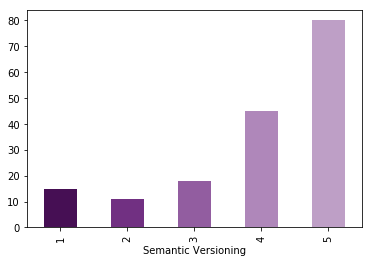

In [15]:
import matplotlib as plt
%matplotlib inline

colours = ['#460f54','#713082','#925da0','#af87ba', '#be9fc6', '#d3bed8', '#eae1ed' ]

df.groupby('Semantic Versioning')['Semantic Versioning'].count().plot(kind='bar', color = colours)

In [26]:
df.groupby('Semantic Versioning')['Semantic Versioning'].count()

Semantic Versioning
1    15
2    11
3    18
4    45
5    80
Name: Semantic Versioning, dtype: int64

So in general people are quite well aware of semantic versioning (1 being unaware, to 5 being very familiar with it). A little under half have changed their approach to dependencies (1 is yes, 2 is no), while about 60% use versioning tools for their own projects (1 is yes, 2 is no).

#### Developer Experience

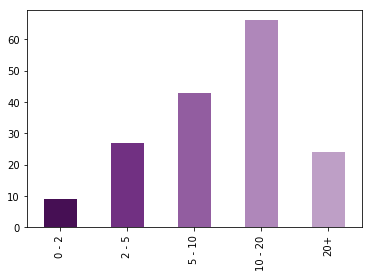

In [16]:
df.groupby('XP')['XP'].count().plot(kind='bar', color=colours).set_xlabel("")

In [25]:
df.groupby('XP')['XP'].count()

XP
0 - 2       9
2 - 5      27
5 - 10     43
10 - 20    66
20+        24
Name: XP, dtype: int64

Experience here is from less than 2 years (option 1) to over 20 years (option 5). Most respondents were within the 5-20 year experience bracket.

#### How developers choose their dependencies

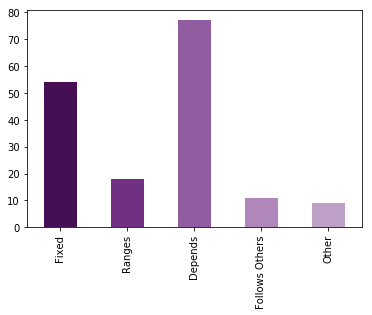

In [17]:
df.groupby('Declaring deps')['Declaring deps'].count().plot(kind='bar', color=colours).set_xlabel("")

In [29]:
df.groupby('Declaring deps')['Declaring deps'].count() / len(df)

Declaring deps
Fixed             0.317647
Ranges            0.105882
Depends           0.452941
Follows Others    0.064706
Other             0.052941
Name: Declaring deps, dtype: float64

Looking at the above, there is about an even split between those who always use either fixed or ranged dependencies, and those who vary based on the situation. This implies that developers are reasonably aware of the risks and rewards involved.

#### Dependency declaration patterns by package manager

In [18]:
cols = [i for i in cols if i not in ["Dub", "Haxelib", "Other"]]

print(round(df.groupby('Declaring deps')[cols].sum() / df[cols].sum() * 100).T)
print(df[cols].sum())
round(df.groupby('Declaring deps')[cols].sum() / df[cols].sum() * 100).T.to_latex()

Declaring deps  Fixed  Ranges  Depends  Follows Others  Other
Atom             29.0     0.0     71.0             0.0    0.0
CPAN             20.0     7.0     47.0            20.0    7.0
CRAN             67.0    17.0     17.0             0.0    0.0
Cargo            26.0     4.0     57.0             4.0    9.0
Elm              25.0    25.0     25.0             0.0   25.0
Hex               0.0     0.0    100.0             0.0    0.0
Homebrew         38.0     6.0     45.0             3.0    8.0
Maven            44.0     0.0     45.0             8.0    1.0
NPM              26.0     9.0     54.0             6.0    5.0
NuGet            21.0     4.0     64.0             4.0    4.0
Packagist        17.0    33.0     42.0             0.0    8.0
Pub               0.0     0.0    100.0             0.0    0.0
Pypi             31.0     5.0     57.0             3.0    3.0
Rubygems         18.0     6.0     71.0             0.0    3.0
Puppet            0.0     0.0     75.0            25.0    0.0
Atom    

'\\begin{tabular}{lrrrrr}\n\\toprule\nDeclaring deps &  Fixed &  Ranges &  Depends &  Follows Others &  Other \\\\\n\\midrule\nAtom      &   29.0 &     0.0 &     71.0 &             0.0 &    0.0 \\\\\nCPAN      &   20.0 &     7.0 &     47.0 &            20.0 &    7.0 \\\\\nCRAN      &   67.0 &    17.0 &     17.0 &             0.0 &    0.0 \\\\\nCargo     &   26.0 &     4.0 &     57.0 &             4.0 &    9.0 \\\\\nElm       &   25.0 &    25.0 &     25.0 &             0.0 &   25.0 \\\\\nHex       &    0.0 &     0.0 &    100.0 &             0.0 &    0.0 \\\\\nHomebrew  &   38.0 &     6.0 &     45.0 &             3.0 &    8.0 \\\\\nMaven     &   44.0 &     0.0 &     45.0 &             8.0 &    1.0 \\\\\nNPM       &   26.0 &     9.0 &     54.0 &             6.0 &    5.0 \\\\\nNuGet     &   21.0 &     4.0 &     64.0 &             4.0 &    4.0 \\\\\nPackagist &   17.0 &    33.0 &     42.0 &             0.0 &    8.0 \\\\\nPub       &    0.0 &     0.0 &    100.0 &             0.0 &    0.0 \\\

In [19]:
# Check about the CRAN responses as they are unexpected
df.info()
print(df[df["CRAN"]][cols])
df[df["CRAN"]]["Semantic Versioning"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 6 to 288
Data columns (total 33 columns):
IPAddress                   170 non-null object
LocationLatitude            170 non-null object
LocationLongitude           170 non-null object
UserLanguage                170 non-null object
XP                          169 non-null category
Package Managers            170 non-null object
Package Managers_19_TEXT    53 non-null object
Semantic Versioning         169 non-null category
Declaring deps              169 non-null category
Declaring deps_5_TEXT       8 non-null object
Approach change             169 non-null category
Appr change reason          66 non-null object
Versioning tools            169 non-null category
Which tools                 95 non-null object
Commentary                  35 non-null object
Atom                        170 non-null bool
CPAN                        170 non-null bool
CRAN                        170 non-null bool
Cargo                       170 n

17     5
24     5
58     4
75     5
121    1
133    4
Name: Semantic Versioning, dtype: category
Categories (5, object): [1, 2, 3, 4, 5]

In [20]:
# Drill into Maven results as well
print([i for i in df[df["Maven"] & df["Commentary"]]["Commentary"]])
df[df["Maven"] & df["Commentary"]][cols + ["Semantic Versioning", "Commentary"]]

['Not currently using any tools to version code but we do not write many public libraries. Would defiantly like to see more tooling in this area in order to give more trust to Semantic Versioning.', 'I will randomly call an update function to update my versions of libraries, but I really only care if 1) the company says we need a specific version/range, or 2) a package has a significant update in a new version at which point I’ll call update on related dependencies.', "I use automated tools (mostly scripts) to identify updated upstream dependencies at the beginning of each sprint. I read patch notes for changes that could affect our use of those dependencies, and ensure that any relevant functionality receives special attention during QA. If necessary, I will schedule required work to facilitate an upgrade in the future if it is not possible now. All versions are pinned via declarative specification in source control.\n\nI try very hard to keep all dependencies up to date with the late

Atom   CPAN   CRAN  Cargo    Elm    Hex  Homebrew  Maven    NPM  NuGet  \
15   False  False  False  False  False  False     False   True   True   True   
51   False  False  False  False  False  False      True   True   True  False   
53   False  False  False  False  False  False      True   True  False  False   
70   False  False  False  False  False  False      True   True  False  False   
89   False  False  False  False  False  False      True   True   True  False   
105  False  False  False  False  False  False     False   True   True  False   
116  False  False  False  False   True  False      True   True  False  False   
126  False   True  False   True  False  False     False   True   True  False   
136  False  False  False  False  False  False      True   True  False  False   
137  False  False  False  False  False  False      True   True   True  False   
139  False  False  False  False  False  False      True   True  False  False   
148   True  False  False  False  False  False      True   True   True  False   
274  False  False  False  False  False  False     False   True  False  False   
279  False  False  False   True  False  False      True   True   True   True   

     Packagist    Pub   Pypi  Rubygems  Puppet Semantic Versioning  \
15       False  False   True     False   False                   5   
51       False  False  False     False   False                   1   
53       False  False  False     False   False                   5   
70       False  False  False     False   False                   5   
89       False  False  False     False   False                   5   
105      False  False  False      True   False                   5   
116      False  False  False     False   False                   5   
126      False  False  False     False   False                   4   
136      False  False  False     False   False                   5   
137      False  False  False     False   False                   4   
139      False  False   True     False   False                   4   
148      False  False   True     False   False                   5   
274      False  False  False      True   False                   1   
279       True  False  False     False   False                   5   

                                            Commentary  
15   Not currently using any tools to version code ...  
51   I will randomly call an update function to upd...  
53   I use automated tools (mostly scripts) to iden...  
70   This is a hard problem, always choose fixed to...  
89   Maven is probably closest to how it should be,...  
105  Semantic versioning is nice in theory but beca...  
116  I try to be as flexible my required dependency...  
126                                   It's a hard work  
136  As often as possible update to use latest vers...  
137  Use lockfiles, and always install directly fro...  
139  I don't really have enough experience with fin...  
148  I especially like to use major.minor.patch-sha...  
274  We also use the Bill Of Materials approach whe...  
279  Gradle gets close to the level of control requ...

Approach change
Yes    71
No     98
Name: Approach change, dtype: int64


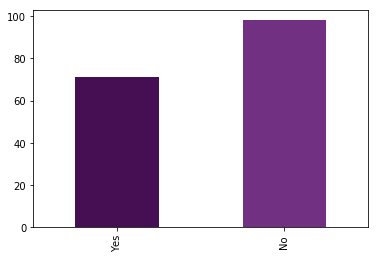

In [21]:
print(df.groupby("Approach change")["Approach change"].count())
df.groupby("Approach change")["Approach change"].count().plot(kind="bar", color=colours).set_xlabel("")

The above numbers are given in percentage points of the overall responses and sum to 100 along each column.

There is some variation based on the package manager used, but certainly less than expected based on the numerical data, of NPM vs Maven for example.

### Reasons for Changing Dependency Style

In [22]:
temp = [print(x + "\n\n") for x in df['Appr change reason'].dropna()]

Changes due to diversifying the list of technologies I've used or developed with. Some languages or projects are best to declare a particular version. I found this is especially true of embedded development. However, not so much when it comes to higher level development.


Staying away form NPM when possible, creating an angular 2 project should not pull 50k dependency files.


In the bad old days, we named our dependencies only, got them from the system package manager, and things almost worked, until Debian Stale didn't have the exact ruby gem or perl module you wanted, and then you hacked it yourself.

Now we have language-specific package managers with transitive dependency locking and a focus on reproducibility, and the world is better for it. If only each language-specific package manager wasn't reinventing so much of the wheel in a different color.

See also:
 - Yarn's (short-lived) triumph over npm for having mandatory and sensible lockfiles.
 - Npm's subsequent response of add

More people are going from ranges to fixed, because they have been burned by patch and minor update releases. However, there is a notable minority that have relaxed their standards, adopting more of a SemVer based minor range approach, so there is not one single clear direction in changes of practice. There are also some differences between commercial builds and open source builds (With open source builds being more relaxed). There are a number of complaints about the number of transitive dependencies within the NPM community, leading to extremely bloated builds. It seems that almost all responses here come back to upstream enforcement of SemVer. In general, those who work with maintenance of legacy code prefer to go to fixed versions rather than ranges.


Quotes:

"Used to be more likely to pin ranges. Now more likely to pin dependencies to a fixed version and use a bit/service like pyup/greenkeeper/dependabot/whatever. Partly because tooling has improved/ become more available. Partly because I am more familiar with it. Partly my code is better tested so can be more confident knowing version bump is safe."

"in serious production code, always fixed version... in open source code, more relaxed"

"At work, some packages we are told to keep under a certain range because it is more supported."

"Taking end-to-end responsibility for software conception, development, and deployment, requires predictable outcomes. If you do not use fixed versions, then rebuilding an artifact to resolve an issue identified during QA testing can cause unrelated changes that can manifest in production."

"It's very painful to keep npm packages up to date due to the huge number of dependencies, and the assumption that the dev environment will allow unrestricted access to the external internet."

"You begin to realize how sloppy upstream people are, and the issues it causes, so you get a bit better about it."

"Because while exact versions give you predictability, they're difficult to keep up to date in manually when you have a lot of dependencies (particularly with pip; pipenv improves on that)."

"Mainly looking at the security checks of older dependencies and figuring out how to minimize the amount of dependencies so that the dependencies that are used can be scrutinized for security vulnerabilities along with using the latest versions (typically those two things correlate)"

"I used to be very careful with specifying ranges (e.g. 3.3.x only, not 3.x) but from my experience, any type of package change is prone to changing behaviour or breaking things. I now rely on testing (automated and QA) to catch any changes when updating packages."

### Tools Used

In [23]:
temp = [print(x + "\n\n") for x in df['Which tools'].dropna()]

A header expension in Sublime or VSCode


Mercurial, Git


Git (ambiguous question, apologies for any misunderstanding)


git


Git


Our CI server versions on build


git if that's what you mean, custom scripts to extract actual version of all dependency binaries if that's what you mean.


git, hg


git


git


git


Git


Git, via TFS mostly


Svn, git— labels 


Git


git


git


Visual Studio


Scripts to align npm versions and git tags


Subversion, Git


cargo update, cargo outdated


npm


IntelliJ IDEA, scripts


Sourcetree


Git, source tree


pyup


Git


Subversion


Git and/or fossil


git


git


Semantic release


git, magit. 


Git


git


git, mercurial


git


Git, SVN


git & custom tools


git tags


bumpversion


Git


git


house made tools


git


https://gitlab.com/philbooth/please-release-me


Git, sbt-release, cabal-release


bazaar


lerna


git


git


svn, git


git


git, mercurial


Git


git


git


npm


git


git


git


git


Git (university, private p

Most respondents use Git for versioning tools.

### General Comments

In [24]:
temp = [print(x + "\n\n") for x in df['Commentary'].dropna()]

Versioning libs is a pain. The best approach is to try to keep up to date. Avoid bit rot and avoid the same infrastructure requiring different versions. 


Not currently using any tools to version code but we do not write many public libraries. Would defiantly like to see more tooling in this area in order to give more trust to Semantic Versioning.


JavaScript versioning is a pain in the ass


I typically use the tools to lock in the versions. So the versions are locked and committed to the repository, so if they change they are stored in version control. Tools like Rubygems, Go dep, NPM, Yarn can do this. So I don't chose the version, but the tool does.


Fixed versions are imperative to ensure all developers and build machines produce equivalent artifacts


I never check dependencies in to the code base. 


Libraries associated with a single deliverable product are versioned together and kept in-sync.


Gentoo portage's slots are very interesting and useful


I will randomly call an

A general summary is that there are a range of developers who took part - some who don't work with very high stakes applications of dependency management, so they do not really understand the pitfalls of it, how their package manager resolves conflicts, or don't mind things breaking, to those who have to deal with it often. In general the consensus is that it is difficult for developers. There is a lot of variety in the ideas that people have of how to fix the problem, which perhaps is to be expected given how varied the solutions to the problem are across the various package managers. Several dislike the NPM style of dependency management and there are comments that web developers play fast and loose with their dependencies.


Quotes:

"In web development, dependency management is very, very relaxed."

"Semantic versioning is more of a social contract than anything technically precise. In Rubygems and NPM, you never really know what a minor or patch version is—it’s down to the author/publisher who often have their own idiosyncratic ideas about what to communicate through version numbers. Some claim to use semantic versioning, but you still sometimes have to look at changelogs and code diffs to really understand the impact of a change on the way you use the code. Often libraries change so much between major versions that they are effectively entirely different internally, and this can have flow on effects. Ideally, package managers would be closely coupled to their source languages, and use versioning systems that were designed for the language conventions. Ideally, different languages with differing concepts of type systems and contracts/boundaries would establish their own standards for versioning, not use the popular one size fits all approach which is rarely applied consistently."

"There is nothing inherently wrong with the way we solve dependencies (in fact, there are some really clever algorithms at play), but it seems to me that we focus on the wrong problem. In many cases, we try to answer the question "is there a conflict between X and a possible dependency Y ?" instead of the much simpler "what does X need to function ?".

...

I believe that completely reproducible builds are the endgame of most dependency management systems."

"Both npm and composer have tools that list the packages you have installed and whether there are any updates available; as part of our CI system we have a task that runs those and raises a warning when dependencies are getting "out-of-date"."



# Summary

While the results are still coming in, with about 150 responses, there are already a number of points that can be taken from the survey so far.

First, there is a large spread of developers, with a good representation of package managers used and wide ranges of development experience. This is good for being able to draw wider conclusions about the results seen so far.

Second, there is a broad knowledge of Semantic Versioning, and at least half of respondents varied their dependency declaration patterns depending on the situation. There is some variation in attitudes based on the package managers used, but on the whole there are not *major* differences between the various developer ecosystems showing so far.

Third, of the qualitative responses, there is a general sense that the idea of Semver is good, but developers do not necessarily trust it as upstream projects have mislabeled versions, breaking code for a large number of respondents who have used version ranges. Some responses highlighted a perception that web development groups are more risk taking in their dependencies, and the numbers for Composer and NPM (both widely used in the web development sphere) do support these observations.
